### Loading the required libraries and data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
clf = LogisticRegression()
rf  = RandomForestClassifier()
xgb = XGBClassifier()

### I have choosen the above three machine learning models as they work perfectly on numerical data and provide model with best accuracy

In [2]:
data = pd.read_csv('F:/Assg_Lumiq/Data.csv')

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,label
0,-2.431423,1.483793,-1.161452,1.791645,0.270695,-0.089481,0.356688,1.632386,-0.572265,0.099085,...,-0.415398,-0.452132,-0.360327,-0.159069,-0.338560,-0.322463,-0.143152,-1.080384,0.538832,0
1,-2.811765,0.697328,-2.056736,0.978536,-0.911127,-0.973984,-1.916140,0.007252,1.290173,-1.655500,...,-0.415398,-0.215571,0.263873,-0.159069,-0.338560,-0.322463,-0.143152,-0.973158,0.538832,1
2,-0.103309,-0.413561,0.030206,-0.230614,-0.200565,-0.235467,0.078330,0.601497,0.102205,0.044518,...,-0.415398,0.115614,-0.776461,-0.159069,1.815429,-0.322463,-0.143152,-0.865932,0.538832,8
3,3.701616,-1.404758,-1.796171,0.263228,0.142206,-0.327979,0.078298,0.339293,-2.803031,0.851896,...,1.510721,0.115614,2.344540,-0.159069,1.456431,-0.322463,-0.143152,-0.758705,0.538832,5
4,1.598397,-0.165481,1.795930,0.755155,-0.604168,-0.633534,-1.055088,-0.442009,1.344237,-0.536694,...,-0.415398,-0.357508,-0.776461,-0.159069,-0.338560,-0.322463,-0.143152,-0.651479,0.538832,9


## Getting the Information about the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337 entries, 0 to 17336
Columns: 135 entries, 0 to label
dtypes: float64(134), int64(1)
memory usage: 17.9 MB


## Checking if null values are present or not in the Data Set

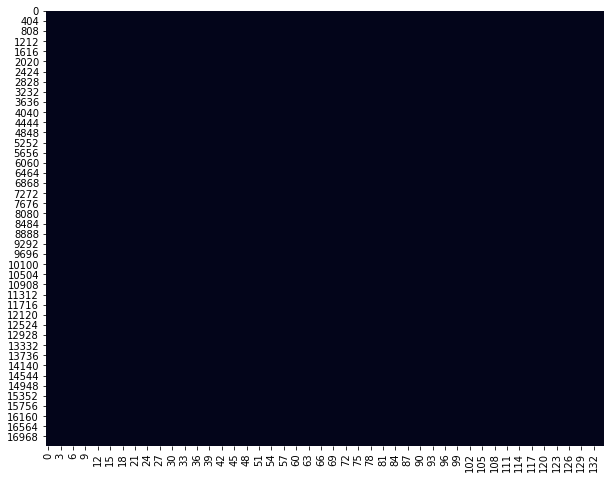

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), cbar=False)

## Ploting the bar plot for value counts of the Labels

Text(0, 0.5, 'Counts')

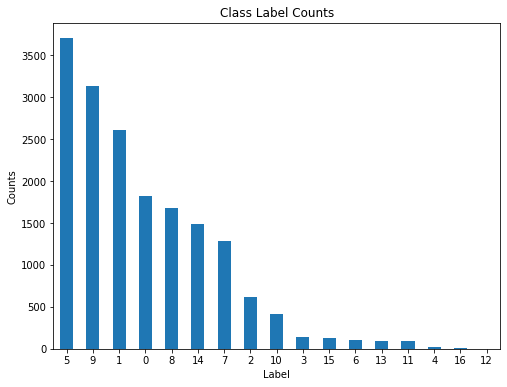

In [6]:
plt.figure(figsize=(8,6))

count_class = pd.value_counts(data['label'], sort=True)

count_class.plot(kind= 'bar', rot=0)

plt.title('Class Label Counts')

plt.xlabel('Label')

plt.ylabel('Counts')

## First Building the BaseLine Machine Learning Models using Logistic Regression, RandomForest and XGBoost considering all 134 features and validating it

In [7]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [8]:
def generate_accuracy(model, x, y):
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x), average='micro')
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)

### Model 1 : LogisticRegression

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [10]:
clf.fit(x_train, y_train)
generate_accuracy(clf, x_test, y_test)

Accuracy is:  0.779123414071511
F1 score is:  0.7791234140715111


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Model 2 : RandomForestClassifier

In [11]:
rf.fit(x_train, y_train)
generate_accuracy(rf, x_test, y_test)

Accuracy is:  0.8486159169550173
F1 score is:  0.8486159169550173


### Model 3 : ExtremeGradientBoostingClassifier

In [12]:
xgb.fit(x_train, y_train)
generate_accuracy(xgb, x_test, y_test)

Accuracy is:  0.8604382929642446
F1 score is:  0.8604382929642447


In [13]:
data1 = {'ML Models' :['LogisticRegression','RandomForest','XGBoost'],
        'Accuracy'   :[77.9, 85.2, 86.04]}

acc = pd.DataFrame(data1)

acc

,ML Models,Accuracy
0,LogisticRegression,77.90
1,RandomForest,85.20
2,XGBoost,86.04


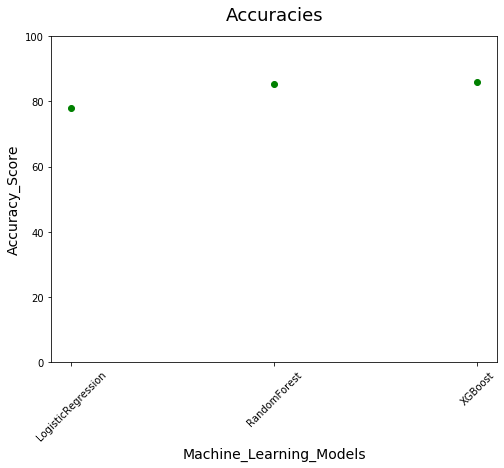

In [14]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy_Score', fontsize = 14)
plt.xlabel('Machine_Learning_Models', fontsize = 14)
plt.title('Accuracies', fontsize = 18, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML Models'], acc['Accuracy'], 'go')

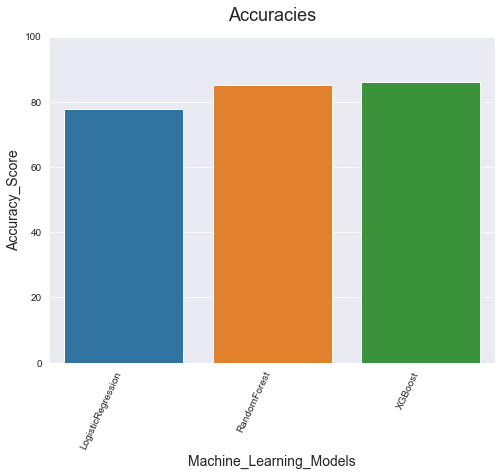

In [15]:
plt.figure(figsize=(8,6))
sns.set_style(style="darkgrid")
plt.title('Accuracies', fontsize = 18, y = 1.03)
plt.ylabel('Accuracy_Score', fontsize = 14)
plt.xlabel('Machine_Learning_Models', fontsize = 14)
plt.xticks(rotation=0, ha='right')
plt.ylim(0,100)
plt.xticks(rotation=65)
ax = sns.barplot(x="ML Models",y = "Accuracy", data=data1)

# Feature Selection Techniques

##  There are broadly 3 Methods of  Feature Selection Techniques that deals large numbers of features:
## 1. SelectKBest Method
## 2. Feature importance Using Tree Based Classifiers
## 3. Using Pearson Correlation


# Method  : SelectKBest 

## SelectKBest Method : The SelectKBest class just scores the features using a function (in this case f_classif but could be others) . Function taking two arrays X and y, and returns a single array with scores.

## Here the Function used is f_classif ( uses ANOVA Test to calculate the score )

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x = data.iloc[:,0:-1] 
y = data.iloc[:,-1]

In [17]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [18]:
featureScores

,Specs,Score
0,0,156.944699
1,1,90.901027
2,2,310.758647
3,3,88.041004
4,4,91.534566
...,...,...
129,129,48.886008
130,130,292.781802
131,131,155.906711
132,132,253.041024


In [19]:
featureScores.nlargest(103,'Score')

,Specs,Score
113,113,1714.368666
72,72,1188.155941
96,96,986.589384
85,85,958.487835
70,70,952.705646
...,...,...
22,22,108.630424
13,13,108.618145
88,88,108.371811
75,75,102.205416


## Here I have considered five sets of Data with different number of features based on their Fscore to know which one will give the get the best accuracy and suits with the models in which i will perform Machine Learning 

## First : The One with minimum score of 700 and above

## Second : The One with minimum score of 600 and above

## Third :  The One with minimum score of 400 and above

## Fourth :  The One with minimum score of 300 and above

## Fifth :  The One with minimum score of 200 and above

## Sixth : The One with minimum score of 100 and above

In [20]:
df1 = featureScores.nlargest(7,'Score') # Scores greater than 700
df2 = featureScores.nlargest(10,'Score') # Scores greater than 600
df3 = featureScores.nlargest(30,'Score') # Scores greater than 400
df4 = featureScores.nlargest(49,'Score') # Scores greater than 300
df5 = featureScores.nlargest(69,'Score') # Scores greater than 200
df6 = featureScores.nlargest(102,'Score') #Scores greater than 100
col1 = df1['Specs'].to_list()
col2 = df2['Specs'].to_list()
col3 = df3['Specs'].to_list()
col4 = df4['Specs'].to_list()
col5 = df5['Specs'].to_list()
col6 = df5['Specs'].to_list()
Df1  = data[col1]
Df2  = data[col2]
Df3  = data[col3]
Df4  = data[col4]
Df5  = data[col5]
Df6  = data[col6]

In [21]:
Df1

,113,72,96,85,70,71,65
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482
...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498


In [22]:
Df2

,113,72,96,85,70,71,65,91,76,97
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761
...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665


In [23]:
Df3

,113,72,96,85,70,71,65,91,76,97,...,86,103,80,89,67,59,94,105,82,73
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,0.226348,0.558248,-0.943919,0.444880,0.560834
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.099119,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.785413,-1.623759,-1.585584,-0.463005,-1.603430,0.226348,1.734370,-1.528547,-0.206783,-1.559182
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.785413,-1.623759,-1.585584,-0.463005,-1.603430,-0.341224,1.734370,-1.528547,-0.206783,-1.559182
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-0.975378,0.841009,-0.689262,-1.114095,1.143882,-0.341224,-1.527739,1.411413,-1.179941,0.603193
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-0.975378,0.841009,-0.689262,-1.114095,1.143882,6.469631,-1.527739,1.411413,-1.179941,0.603193


In [24]:
Df4

,113,72,96,85,70,71,65,91,76,97,...,68,61,38,79,19,7,60,98,2,33
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,-1.848086,-1.503210,0.159144,0.226110,1.632386,0.939621,0.738142,-1.161452,0.864091
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,0.575377,0.999451,0.159144,-0.662573,0.007252,0.108530,0.738142,-2.056736,-0.223796
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,0.548745,0.005752,0.159144,0.140167,0.601497,0.364250,0.738142,0.030206,0.461599
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,0.488824,0.812722,0.159144,-0.518279,0.339293,0.316302,0.738142,-1.796171,0.172069
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.337791,-0.463250,-0.603825,0.159144,0.349404,-0.442009,0.939621,0.738142,1.795930,-0.323634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.214260,-0.601734,0.005752,0.951645,0.140167,0.601497,1.438275,2.906519,0.030206,0.461599
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.214260,0.090684,-0.496355,0.951645,1.097358,1.075955,0.773402,2.906519,-0.449048,0.405323
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.936362,-1.848086,-0.452617,0.755306,-1.302674,-2.221331,-1.553653,0.593495,-1.669528,-1.926168
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.936362,-0.154982,-0.100636,0.755306,-1.586299,-0.062259,1.247010,0.593495,0.286161,0.119286


In [25]:
Df5

,113,72,96,85,70,71,65,91,76,97,...,41,102,30,92,40,46,83,84,81,23
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.958911,-3.028270,0.555455,0.077495,0.309263,-0.156046,-2.560023,-0.756626,-3.271733,0.390958
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.451498,-3.028270,0.797356,0.077495,-1.045948,-2.458225,-2.560023,-0.756626,-3.271733,0.470486
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.153561,-3.028270,-1.182271,0.077495,-0.387577,-0.448275,-2.560023,-0.756626,-3.271733,-0.225943
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,1.141647,-3.028270,-1.164497,0.077495,-0.702430,-0.922842,-2.560023,-0.756626,-3.271733,-0.016048
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.293822,-3.028270,-0.073803,0.077495,2.915756,0.461700,-2.560023,-0.756626,-3.271733,1.400092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,0.153561,-0.635776,-1.182271,-0.183000,-0.387577,-0.448275,0.684935,0.082434,0.135126,-0.225943
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-2.243489,-0.635776,-1.246488,-0.183000,-0.972849,1.147504,0.684935,0.082434,0.135126,-1.557819
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-1.269524,0.151747,-0.044465,-0.310152,0.658095,1.386316,0.304160,0.585044,-0.369083,-0.731317
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.452781,0.151747,1.442174,-0.310152,-0.425702,-1.705648,0.304160,0.585044,-0.369083,-0.477163


In [26]:
Exp_1 = pd.concat([Df1, data['label']], axis=1)
Exp_2 = pd.concat([Df2, data['label']], axis=1)
Exp_3 = pd.concat([Df3, data['label']], axis=1)
Exp_4 = pd.concat([Df4, data['label']], axis=1)
Exp_5 = pd.concat([Df5, data['label']], axis=1)
Exp_6 = pd.concat([Df6, data['label']], axis=1)

In [27]:
Exp_1

,113,72,96,85,70,71,65,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,9
...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1


In [28]:
Exp_2

,113,72,96,85,70,71,65,91,76,97,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,9
...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,1


In [29]:
Exp_3

,113,72,96,85,70,71,65,91,76,97,...,103,80,89,67,59,94,105,82,73,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,0.226348,0.558248,-0.943919,0.444880,0.560834,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.340762,0.218429,-0.925046,-0.301193,-0.341224,0.558248,-0.943919,0.444880,0.560834,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-1.623759,-1.585584,-0.463005,-1.603430,0.226348,1.734370,-1.528547,-0.206783,-1.559182,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-1.623759,-1.585584,-0.463005,-1.603430,-0.341224,1.734370,-1.528547,-0.206783,-1.559182,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.841009,-0.689262,-1.114095,1.143882,-0.341224,-1.527739,1.411413,-1.179941,0.603193,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.841009,-0.689262,-1.114095,1.143882,6.469631,-1.527739,1.411413,-1.179941,0.603193,1


In [30]:
Exp_4

,113,72,96,85,70,71,65,91,76,97,...,61,38,79,19,7,60,98,2,33,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-1.848086,-1.503210,0.159144,0.226110,1.632386,0.939621,0.738142,-1.161452,0.864091,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.575377,0.999451,0.159144,-0.662573,0.007252,0.108530,0.738142,-2.056736,-0.223796,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.548745,0.005752,0.159144,0.140167,0.601497,0.364250,0.738142,0.030206,0.461599,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,0.488824,0.812722,0.159144,-0.518279,0.339293,0.316302,0.738142,-1.796171,0.172069,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-0.463250,-0.603825,0.159144,0.349404,-0.442009,0.939621,0.738142,1.795930,-0.323634,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.601734,0.005752,0.951645,0.140167,0.601497,1.438275,2.906519,0.030206,0.461599,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,0.090684,-0.496355,0.951645,1.097358,1.075955,0.773402,2.906519,-0.449048,0.405323,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-1.848086,-0.452617,0.755306,-1.302674,-2.221331,-1.553653,0.593495,-1.669528,-1.926168,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,-0.154982,-0.100636,0.755306,-1.586299,-0.062259,1.247010,0.593495,0.286161,0.119286,1


In [31]:
Exp_5

,113,72,96,85,70,71,65,91,76,97,...,102,30,92,40,46,83,84,81,23,label
0,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,0.555455,0.077495,0.309263,-0.156046,-2.560023,-0.756626,-3.271733,0.390958,0
1,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,0.797356,0.077495,-1.045948,-2.458225,-2.560023,-0.756626,-3.271733,0.470486,1
2,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,-1.182271,0.077495,-0.387577,-0.448275,-2.560023,-0.756626,-3.271733,-0.225943,8
3,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,-1.164497,0.077495,-0.702430,-0.922842,-2.560023,-0.756626,-3.271733,-0.016048,5
4,-0.460660,-0.003045,1.260648,-0.172030,1.711205,0.054990,-0.978482,-1.671336,-1.526571,0.854761,...,-3.028270,-0.073803,0.077495,2.915756,0.461700,-2.560023,-0.756626,-3.271733,1.400092,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.635776,-1.182271,-0.183000,-0.387577,-0.448275,0.684935,0.082434,0.135126,-0.225943,1
17333,-0.460660,0.616005,-0.556824,-0.478335,0.412713,1.529447,-0.654689,-0.010865,0.782251,-0.831754,...,-0.635776,-1.246488,-0.183000,-0.972849,1.147504,0.684935,0.082434,0.135126,-1.557819,1
17334,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.151747,-0.044465,-0.310152,0.658095,1.386316,0.304160,0.585044,-0.369083,-0.731317,2
17335,2.170796,1.890017,-1.730411,-1.550426,-1.659385,-1.803755,-1.611498,1.424252,1.626802,-1.525665,...,0.151747,1.442174,-0.310152,-0.425702,-1.705648,0.304160,0.585044,-0.369083,-0.477163,1


## Dividing the DataSet based on dependent and independent features 

In [32]:
x = Exp_1.iloc[:,:-1].values
y = Exp_1.iloc[:,-1].values
x2 = Exp_2.iloc[:,:-1].values
y2 = Exp_2.iloc[:,-1].values
x3 = Exp_3.iloc[:,:-1].values
y3 = Exp_3.iloc[:,-1].values
x4 = Exp_4.iloc[:,:-1].values
y4 = Exp_4.iloc[:,-1].values
x5 = Exp_5.iloc[:,:-1].values
y5 = Exp_5.iloc[:,-1].values
x6 = Exp_6.iloc[:,:-1].values
y6 = Exp_6.iloc[:,-1].values

## Starting with building the ML Model based on base Machine Learning Algorithms - Logistic Regression and Validating it 


In [33]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.2, random_state=42)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3, test_size=0.2, random_state=42)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4,y4, test_size=0.2, random_state=42)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5,y5, test_size=0.2, random_state=42)
x_train6, x_test6, y_train6, y_test6 = train_test_split(x6,y6, test_size=0.2, random_state=42)

## LogisticRegression

In [34]:
clf.fit(x_train1,y_train1)
generate_accuracy(clf, x_test1, y_test1)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
clf.fit(x_train2,y_train2)
generate_accuracy(clf, x_test2, y_test2)

Accuracy is:  0.4749134948096886
F1 score is:  0.4749134948096886


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
clf.fit(x_train3,y_train3)
generate_accuracy(clf, x_test3, y_test3)

Accuracy is:  0.5657439446366782
F1 score is:  0.5657439446366782


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
clf.fit(x_train4,y_train4)
generate_accuracy(clf, x_test4, y_test4)

Accuracy is:  0.7081891580161477
F1 score is:  0.7081891580161477


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
clf.fit(x_train5,y_train4)
generate_accuracy(clf, x_test5, y_test5)

Accuracy is:  0.7459630911188004
F1 score is:  0.7459630911188004


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
clf.fit(x_train6,y_train6)
generate_accuracy(clf, x_test6, y_test6)

Accuracy is:  0.7459630911188004
F1 score is:  0.7459630911188004


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
d1 = {'Score' :['Score>700','Score>600','Score>400','Score>300','Score>200','Score>100'],
        'Accuracy':[47.2, 47.5, 56.57, 70.81, 74.6, 74.59]}

acc = pd.DataFrame(d1)

acc

,Score,Accuracy
0,Score>700,47.20
1,Score>600,47.50
2,Score>400,56.57
3,Score>300,70.81
4,Score>200,74.60
5,Score>100,74.59


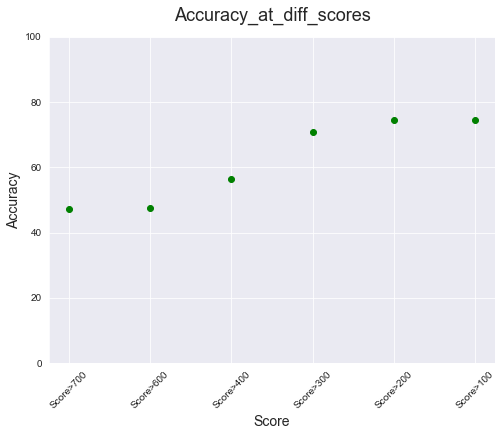

In [41]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['Score'], acc['Accuracy'], 'go')

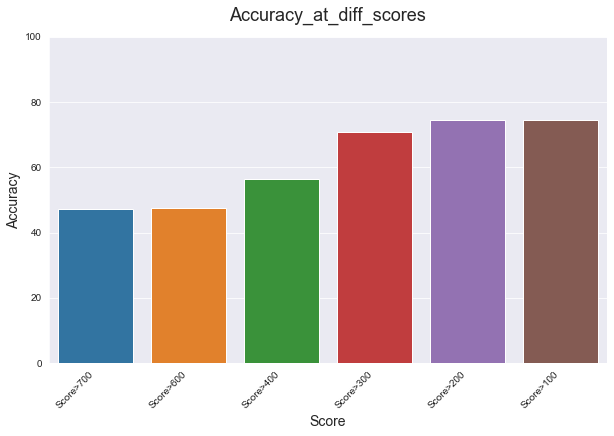

In [42]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="Score",y = "Accuracy", data=d1)

## RandomForestClassifier

In [43]:
rf.fit(x_train1,y_train1)
generate_accuracy(rf, x_test1, y_test1)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


In [44]:
rf.fit(x_train2,y_train2)
generate_accuracy(rf, x_test2, y_test2)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


In [45]:
rf.fit(x_train3,y_train3)
generate_accuracy(rf, x_test3, y_test3)

Accuracy is:  0.6513840830449827
F1 score is:  0.6513840830449827


In [46]:
rf.fit(x_train4,y_train4)
generate_accuracy(rf, x_test4, y_test4)

Accuracy is:  0.816320645905421
F1 score is:  0.816320645905421


In [47]:
rf.fit(x_train5,y_train5)
generate_accuracy(rf, x_test5, y_test5)

Accuracy is:  0.8391003460207612
F1 score is:  0.8391003460207612


In [48]:
rf.fit(x_train6,y_train6)
generate_accuracy(rf, x_test6, y_test6)

Accuracy is:  0.8353517877739332
F1 score is:  0.835351787773933


In [ ]:
d2 = {'Score' :['Score>700','Score>600','Score>400','Score>300','Score>200','Score>100'],
        'Accuracy':[47.23, 47.23, 65.05, 81.63, 83.91,83.53]}

acc = pd.DataFrame(d2)

acc

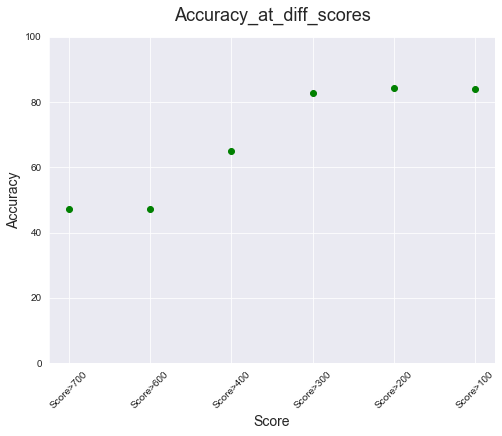

In [50]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['Score'], acc['Accuracy'], 'go')

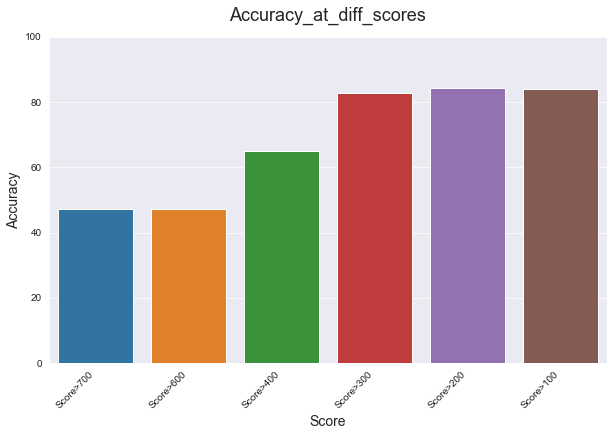

In [51]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="Score",y = "Accuracy", data=d2)

## ExtremeGradientBoosting Classifier

In [52]:
xgb.fit(x_train1,y_train1)
generate_accuracy(xgb, x_test1, y_test1)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


In [53]:
xgb.fit(x_train2,y_train2)
generate_accuracy(xgb, x_test2, y_test2)

Accuracy is:  0.47231833910034604
F1 score is:  0.47231833910034604


In [54]:
xgb.fit(x_train3,y_train3)
generate_accuracy(xgb, x_test3, y_test3)

Accuracy is:  0.6585928489042676
F1 score is:  0.6585928489042676


In [55]:
xgb.fit(x_train4,y_train4)
generate_accuracy(xgb, x_test4, y_test4)

Accuracy is:  0.8241061130334487
F1 score is:  0.8241061130334486


In [56]:
xgb.fit(x_train5,y_train5)
generate_accuracy(xgb, x_test5, y_test5)

Accuracy is:  0.8440023068050749
F1 score is:  0.8440023068050749


In [57]:
xgb.fit(x_train6,y_train6)
generate_accuracy(xgb, x_test6, y_test6)

Accuracy is:  0.8440023068050749
F1 score is:  0.8440023068050749


In [58]:
d3 = {'Score' :['Score>700','Score>600','Score>400','Score>300','Score>200','Score>100'],
        'Accuracy':[47.23, 47.23, 65.85, 82.4, 84.4,84.4]}

acc = pd.DataFrame(d3)

acc

,Score,Accuracy
0,Score>700,47.23
1,Score>600,47.23
2,Score>400,65.85
3,Score>300,82.40
4,Score>200,84.40
5,Score>100,84.40


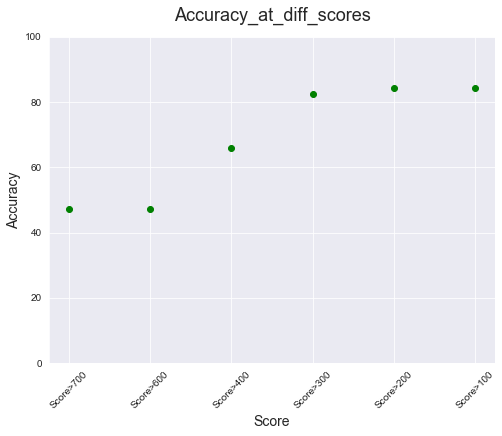

In [59]:
plt.figure(figsize=(8,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['Score'], acc['Accuracy'], 'go')

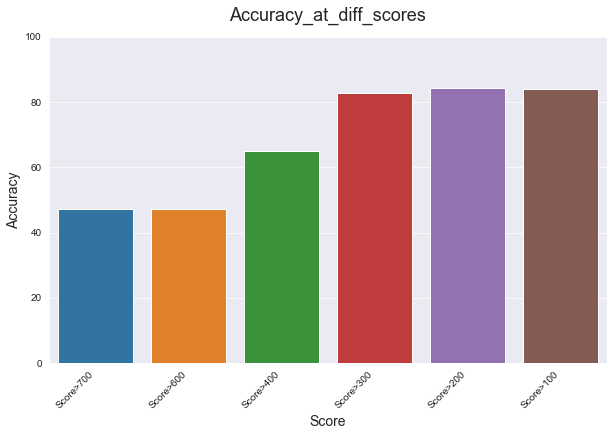

In [60]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Score', fontsize = 14)
plt.title('Accuracy_at_diff_scores', fontsize = 18, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="Score",y = "Accuracy", data=d2)

# Method 2 : Feature importance Using Tree Based Classifiers


### Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable

### In this method i have performed five different operations with different number of features based on their feature importance score with the dependent feature of the data ('label') to know which set of features are most useful to build model in order to attain max accuracy

[7.93634100e-03 6.51860041e-03 8.74065421e-03 6.42297812e-03
 7.08236563e-03 6.84146012e-03 7.24314956e-03 6.86929333e-03
 9.72627651e-03 8.24822986e-03 5.83729782e-03 8.57402175e-03
 7.27787249e-03 7.02014739e-03 6.60544692e-03 7.42330887e-03
 9.31251494e-03 7.89332307e-03 9.68604764e-03 6.97994834e-03
 7.12467171e-03 7.17958364e-03 8.91551773e-03 7.13760170e-03
 9.23042959e-03 9.44389366e-03 8.63889064e-03 5.93633881e-03
 8.45797883e-03 7.55235438e-03 1.40640680e-02 7.78877568e-03
 6.02485023e-03 1.02631693e-02 7.88355360e-03 6.83668609e-03
 6.98557979e-03 8.35872613e-03 1.18391892e-02 6.79820911e-03
 1.03396301e-02 7.68644997e-03 6.84223069e-03 1.03830443e-02
 5.92911134e-03 8.46480432e-03 7.21862644e-03 8.96225909e-03
 5.91971654e-03 7.03649002e-03 1.94286084e-02 3.24840258e-03
 1.61163473e-02 1.73269663e-02 1.53866570e-02 2.17284077e-02
 8.42545844e-03 1.78275711e-02 1.63445854e-02 8.70800749e-03
 2.60406509e-02 2.48260308e-02 2.70119530e-02 1.30414873e-03
 1.34210198e-03 5.501029

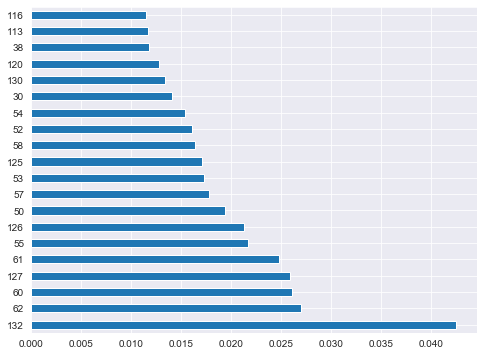

In [61]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## 1. Top 20 features with highest score

In [62]:
x = feat_importances.nlargest(20)
y = x.to_frame()
y.head()

,0
132,0.042508
62,0.027012
60,0.026041
127,0.025937
61,0.024826


In [63]:
col1 = y.index.values.tolist()
df = data[col1]
df20 = pd.concat([df,data['label']], axis=1)
df20

,132,62,60,127,61,55,126,50,57,53,...,58,52,54,30,130,120,38,113,116,label
0,-1.080384,0.835272,0.939621,-0.360327,-1.848086,-0.428871,-0.452132,-0.546214,-0.399375,-0.552641,...,-0.392835,-0.415936,-0.384329,0.555455,-0.322463,-0.194507,-1.503210,-0.460660,-0.540792,0
1,-0.973158,0.086622,0.108530,0.263873,0.575377,-0.182729,-0.215571,-0.546214,-0.005420,-0.552641,...,0.010922,-0.073106,-0.384329,0.797356,-0.322463,-0.194507,0.999451,-0.460660,-0.540792,1
2,-0.865932,-0.028555,0.364250,-0.776461,0.548745,0.008714,0.115614,1.492851,-0.399375,-0.552641,...,-0.392835,-0.073106,0.558302,-1.182271,-0.322463,-0.194507,0.005752,-0.460660,-0.540792,8
3,-0.758705,-0.287703,0.316302,2.344540,0.488824,0.200157,0.115614,1.201556,0.191558,-0.552641,...,0.212801,-0.073106,0.322645,-1.164497,-0.322463,-0.194507,0.812722,-0.460660,-0.540792,5
4,-0.651479,-0.662028,0.939621,-0.776461,-0.463250,-0.428871,-0.357508,-0.254919,-0.399375,0.816289,...,-0.392835,0.269723,-0.384329,-0.073803,-0.322463,-0.194507,-0.603825,-0.460660,-0.540792,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,0.099106,-0.512298,1.438275,0.471940,-0.601734,-0.264776,-0.215571,-0.546214,-0.202397,-0.552641,...,-0.190956,0.269723,0.322645,-1.182271,-0.322463,-0.194507,0.005752,-0.460660,-0.540792,1
17333,0.206332,-0.212838,0.773402,0.263873,0.090684,-0.128031,-0.191915,-0.546214,-0.005420,-0.552641,...,0.212801,-0.415936,-0.384329,-1.246488,-0.322463,-0.194507,-0.496355,-0.460660,-0.540792,1
17334,0.313558,-1.410678,-1.553653,-0.568394,-1.848086,-0.456220,-0.475789,-0.546214,-0.399375,-0.552641,...,-0.392835,-0.415936,-0.384329,-0.044465,-0.322463,-0.194507,-0.452617,2.170796,-0.540792,2
17335,0.420785,-0.595367,1.247010,0.055806,-0.154982,5.916108,5.556521,1.492851,4.919021,-0.552641,...,5.057892,3.698019,1.854420,1.442174,-0.322463,-0.194507,-0.100636,2.170796,-0.540792,1


In [64]:
x20 = df20.iloc[:,:-1].values
y20 = df20.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x20,y20, test_size=0.2, random_state=42)

## LogisticRegression

In [65]:
clf.fit(x_train,y_train)
generate_accuracy(clf, x_test, y_test)

Accuracy is:  0.7292387543252595
F1 score is:  0.7292387543252596


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## RandomForestClassifier

In [66]:
rf.fit(x_train,y_train)
generate_accuracy(rf, x_test, y_test)

Accuracy is:  0.8451557093425606
F1 score is:  0.8451557093425606


## ExtremeGradientBoostingClassifier

In [67]:
xgb.fit(x_train,y_train)
generate_accuracy(xgb, x_test, y_test)

Accuracy is:  0.8491926182237601
F1 score is:  0.8491926182237601


## Ploting the Accuracies of all the three models

In [68]:
d20 = {'ML_Model'  :['LogisticRegression','RandomForest','XGBoost'],
        'Accuracy':[76.2,85.58,85.66]}

acc = pd.DataFrame(d20)

acc

,ML_Model,Accuracy
0,LogisticRegression,76.20
1,RandomForest,85.58
2,XGBoost,85.66


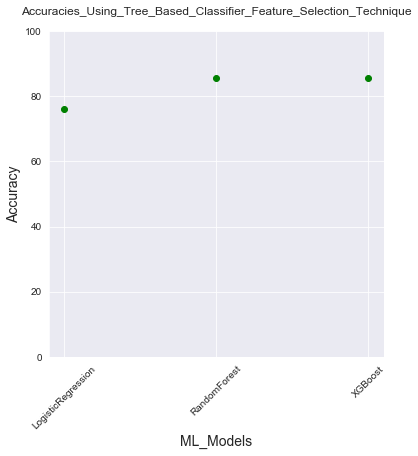

In [69]:
plt.figure(figsize=(6,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Feature_Selection_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML_Model'], acc['Accuracy'], 'go')

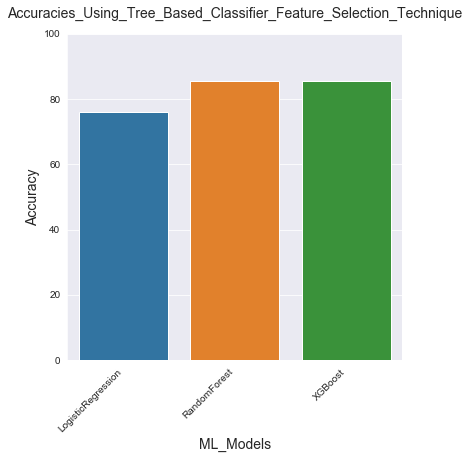

In [72]:
plt.figure(figsize=(6,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Feature_Selection_Technique', fontsize = 14, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="ML_Model",y = "Accuracy", data=d20)

## 2. Top 40 features with highest score

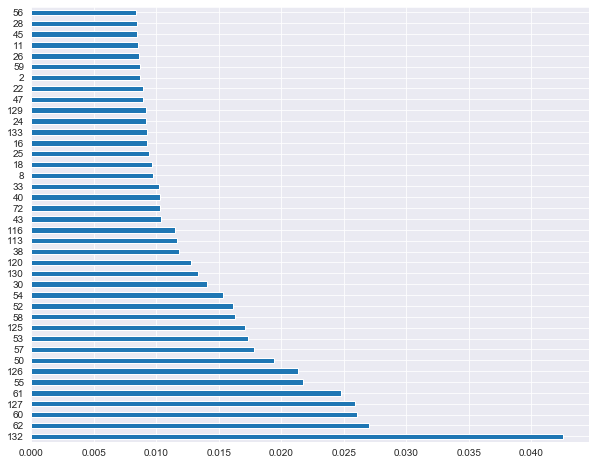

In [73]:
plt.figure(figsize=(10,8))
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

In [74]:
x = feat_importances.nlargest(40)
y = x.to_frame()
y.head()

,0
132,0.042508
62,0.027012
60,0.026041
127,0.025937
61,0.024826


In [75]:
col2 = y.index.values.tolist()
df = data[col2]
df40 = pd.concat([df,data['label']], axis=1)
df40

,132,62,60,127,61,55,126,50,57,53,...,47,22,2,59,26,11,45,28,56,label
0,-1.080384,0.835272,0.939621,-0.360327,-1.848086,-0.428871,-0.452132,-0.546214,-0.399375,-0.552641,...,-1.718038,-0.254454,-1.161452,-0.341224,-1.564886,0.602834,0.087865,-0.758258,-0.346411,0
1,-0.973158,0.086622,0.108530,0.263873,0.575377,-0.182729,-0.215571,-0.546214,-0.005420,-0.552641,...,0.635025,-1.015324,-2.056736,-0.341224,-0.419912,0.488801,-0.111135,-2.694637,-0.346411,1
2,-0.865932,-0.028555,0.364250,-0.776461,0.548745,0.008714,0.115614,1.492851,-0.399375,-0.552641,...,-0.271764,-0.322554,0.030206,-0.341224,0.244520,-0.143971,-0.200695,0.131573,-0.346411,8
3,-0.758705,-0.287703,0.316302,2.344540,0.488824,0.200157,0.115614,1.201556,0.191558,-0.552641,...,-0.821228,-0.987009,-1.796171,0.226348,1.958437,1.434175,0.590982,-2.795550,0.797755,5
4,-0.651479,-0.662028,0.939621,-0.776461,-0.463250,-0.428871,-0.357508,-0.254919,-0.399375,0.816289,...,0.654749,1.165656,1.795930,-0.341224,1.571970,2.282873,-0.613649,-0.189729,-0.346411,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,0.099106,-0.512298,1.438275,0.471940,-0.601734,-0.264776,-0.215571,-0.546214,-0.202397,-0.552641,...,-0.271764,-0.322554,0.030206,0.226348,0.244520,-0.143971,-0.200695,0.131573,0.225672,1
17333,0.206332,-0.212838,0.773402,0.263873,0.090684,-0.128031,-0.191915,-0.546214,-0.005420,-0.552641,...,0.909632,-0.646061,-0.449048,-0.341224,-0.091072,-0.119648,-0.112075,0.740893,-0.346411,1
17334,0.313558,-1.410678,-1.553653,-0.568394,-1.848086,-0.456220,-0.475789,-0.546214,-0.399375,-0.552641,...,-0.402356,-1.468308,-1.669528,-0.341224,-1.731686,-0.281345,-0.055861,1.279246,-0.346411,2
17335,0.420785,-0.595367,1.247010,0.055806,-0.154982,5.916108,5.556521,1.492851,4.919021,-0.552641,...,-0.876191,-0.639181,0.286161,6.469631,-0.456024,-0.797227,-0.240401,0.694541,4.802335,1


In [76]:
x40 = df40.iloc[:,:-1].values
y40 = df40.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x40,y40, test_size=0.2, random_state=42)

## Logistic Regression

In [77]:
clf.fit(x_train,y_train)
generate_accuracy(clf, x_test, y_test)

Accuracy is:  0.7664359861591695
F1 score is:  0.7664359861591695


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## RandomForestClassifier

In [78]:
rf.fit(x_train,y_train)
generate_accuracy(rf, x_test, y_test)

Accuracy is:  0.8604382929642446
F1 score is:  0.8604382929642447


## ExtremeGradientBoosting

In [79]:
xgb.fit(x_train,y_train)
generate_accuracy(xgb, x_test, y_test)

Accuracy is:  0.8517877739331027
F1 score is:  0.8517877739331028


## Ploting the Accuracies of all the three models

In [80]:
d40 = {'ML_Model'  :['LogisticRegression','RandomForest','XGBoost'],
        'Accuracy':[75.8,86.04,85.17]}

acc = pd.DataFrame(d40)

acc

,ML_Model,Accuracy
0,LogisticRegression,75.80
1,RandomForest,86.04
2,XGBoost,85.17


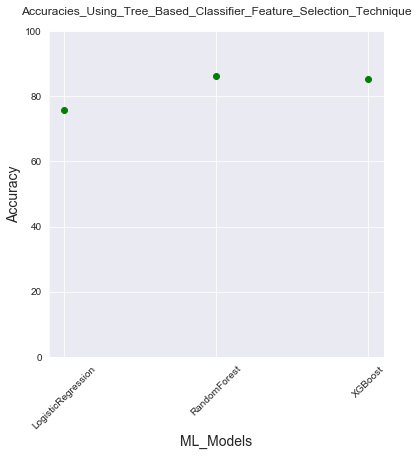

In [81]:
plt.figure(figsize=(6,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Feature_Selection_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML_Model'], acc['Accuracy'], 'go')

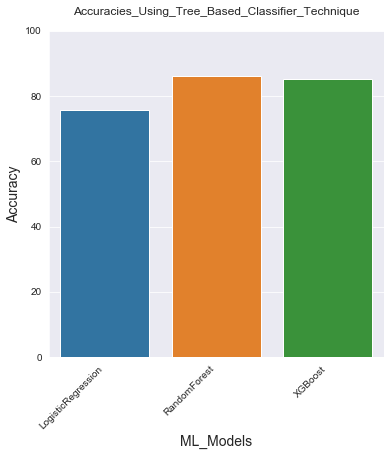

In [82]:
plt.figure(figsize=(6,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="ML_Model",y = "Accuracy", data=d40)

## 3. Top 60 features with highest score

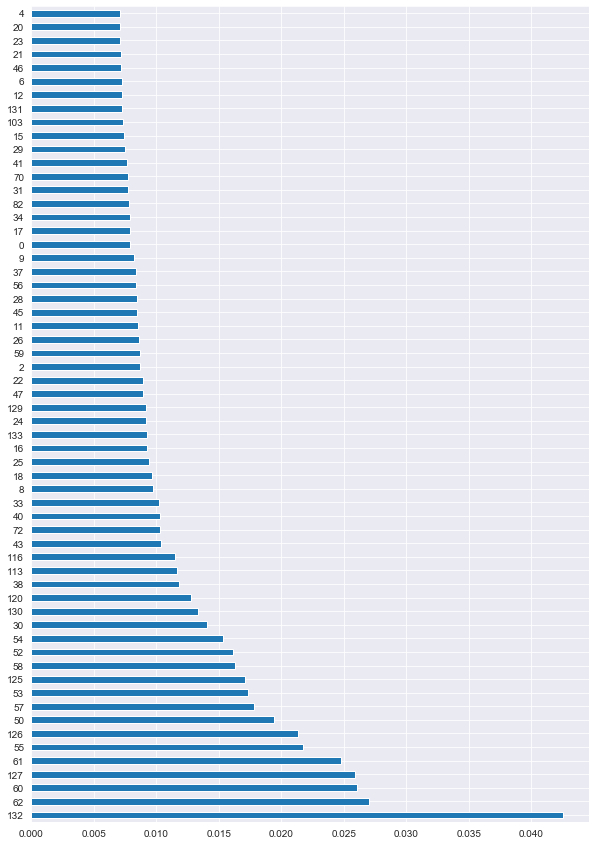

In [83]:
plt.figure(figsize=(10,15))
feat_importances.nlargest(60).plot(kind='barh')
plt.show()

In [84]:
x = feat_importances.nlargest(60)
y = x.to_frame()
y.head()

,0
132,0.042508
62,0.027012
60,0.026041
127,0.025937
61,0.024826


In [85]:
col3 = y.index.values.tolist()
df = data[col3]
df60 = pd.concat([df,data['label']], axis=1)
df60

,132,62,60,127,61,55,126,50,57,53,...,103,131,12,6,46,21,23,20,4,label
0,-1.080384,0.835272,0.939621,-0.360327,-1.848086,-0.428871,-0.452132,-0.546214,-0.399375,-0.552641,...,0.340762,-0.143152,-2.611784,0.356688,-0.156046,-0.854073,0.390958,-1.663660,0.270695,0
1,-0.973158,0.086622,0.108530,0.263873,0.575377,-0.182729,-0.215571,-0.546214,-0.005420,-0.552641,...,0.340762,-0.143152,0.869589,-1.916140,-2.458225,-0.068859,0.470486,0.126520,-0.911127,1
2,-0.865932,-0.028555,0.364250,-0.776461,0.548745,0.008714,0.115614,1.492851,-0.399375,-0.552641,...,0.340762,-0.143152,0.214676,0.078330,-0.448275,0.211500,-0.225943,-0.252236,-0.200565,8
3,-0.758705,-0.287703,0.316302,2.344540,0.488824,0.200157,0.115614,1.201556,0.191558,-0.552641,...,0.340762,-0.143152,-0.865605,0.078298,-0.922842,0.069215,-0.016048,-0.905113,0.142206,5
4,-0.651479,-0.662028,0.939621,-0.776461,-0.463250,-0.428871,-0.357508,-0.254919,-0.399375,0.816289,...,0.340762,-0.143152,1.026805,-1.055088,0.461700,-0.273374,1.400092,0.651725,-0.604168,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,0.099106,-0.512298,1.438275,0.471940,-0.601734,-0.264776,-0.215571,-0.546214,-0.202397,-0.552641,...,-1.623759,-0.143152,0.214676,0.078330,-0.448275,0.211500,-0.225943,-0.252236,-0.200565,1
17333,0.206332,-0.212838,0.773402,0.263873,0.090684,-0.128031,-0.191915,-0.546214,-0.005420,-0.552641,...,-1.623759,-0.143152,0.039760,1.699141,1.147504,-1.745880,-1.557819,-0.478399,-1.940294,1
17334,0.313558,-1.410678,-1.553653,-0.568394,-1.848086,-0.456220,-0.475789,-0.546214,-0.399375,-0.552641,...,0.841009,-0.143152,0.118405,0.774062,1.386316,0.353407,-0.731317,-0.153119,1.283522,2
17335,0.420785,-0.595367,1.247010,0.055806,-0.154982,5.916108,5.556521,1.492851,4.919021,-0.552641,...,0.841009,-0.143152,2.229185,-0.900117,-1.705648,-1.821613,-0.477163,0.765161,0.984242,1


In [86]:
x60 = df60.iloc[:,:-1].values
y60 = df60.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x60,y60, test_size=0.2, random_state=42)

## LogisticRegression

In [87]:
clf.fit(x_train,y_train)
generate_accuracy(clf, x_test, y_test)

Accuracy is:  0.7771049596309112
F1 score is:  0.7771049596309112


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## RandomForestClassifier

In [88]:
rf.fit(x_train,y_train)
generate_accuracy(rf, x_test, y_test)

Accuracy is:  0.8526528258362168
F1 score is:  0.8526528258362168


## ExtremeGradientBoosting Classifier

In [89]:
xgb.fit(x_train,y_train)
generate_accuracy(xgb, x_test, y_test)

Accuracy is:  0.8584198385236448
F1 score is:  0.8584198385236448


## Ploting the Accuracies of all the three models

In [90]:
d60 = {'ML_Model'  :['LogisticRegression','RandomForest','XGBoost'],
        'Accuracy':[78.1,85.26,85.84]}

acc = pd.DataFrame(d60)

acc

,ML_Model,Accuracy
0,LogisticRegression,78.10
1,RandomForest,85.26
2,XGBoost,85.84


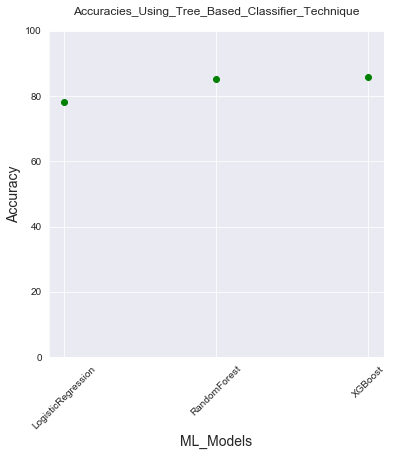

In [91]:
plt.figure(figsize=(6,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML_Model'], acc['Accuracy'], 'go')

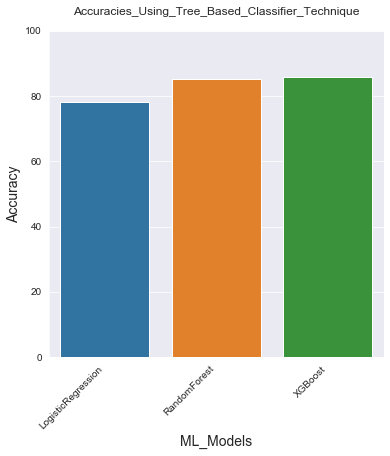

In [92]:
plt.figure(figsize=(6,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="ML_Model",y = "Accuracy", data=d60)

## 4. Top 80 features with highest score

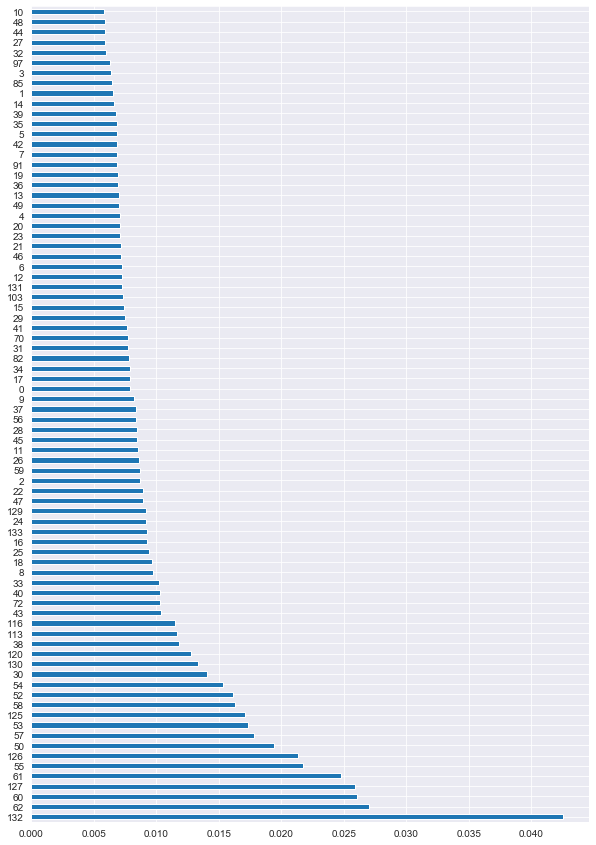

In [93]:
plt.figure(figsize=(10,15))
feat_importances.nlargest(80).plot(kind='barh')
plt.show()

In [94]:
x = feat_importances.nlargest(80)
y = x.to_frame()
y.head()

,0
132,0.042508
62,0.027012
60,0.026041
127,0.025937
61,0.024826


In [95]:
col4 = y.index.values.tolist()
df = data[col4]
df80 = pd.concat([df,data['label']], axis=1)
df80

,132,62,60,127,61,55,126,50,57,53,...,1,85,3,97,32,27,44,48,10,label
0,-1.080384,0.835272,0.939621,-0.360327,-1.848086,-0.428871,-0.452132,-0.546214,-0.399375,-0.552641,...,1.483793,-0.172030,1.791645,0.854761,-0.683309,-1.469919,-1.674358,0.075944,0.510428,0
1,-0.973158,0.086622,0.108530,0.263873,0.575377,-0.182729,-0.215571,-0.546214,-0.005420,-0.552641,...,0.697328,-0.172030,0.978536,0.854761,-0.556727,-1.908337,1.185013,-0.756338,2.227854,1
2,-0.865932,-0.028555,0.364250,-0.776461,0.548745,0.008714,0.115614,1.492851,-0.399375,-0.552641,...,-0.413561,-0.172030,-0.230614,0.854761,0.255605,0.384309,0.107925,-0.363180,-0.131271,8
3,-0.758705,-0.287703,0.316302,2.344540,0.488824,0.200157,0.115614,1.201556,0.191558,-0.552641,...,-1.404758,-0.172030,0.263228,0.854761,-2.077489,0.193299,-0.769204,2.885560,0.164266,5
4,-0.651479,-0.662028,0.939621,-0.776461,-0.463250,-0.428871,-0.357508,-0.254919,-0.399375,0.816289,...,-0.165481,-0.172030,0.755155,0.854761,-0.007836,-1.913664,0.803137,0.389386,-0.905760,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,0.099106,-0.512298,1.438275,0.471940,-0.601734,-0.264776,-0.215571,-0.546214,-0.202397,-0.552641,...,-0.413561,-0.478335,-0.230614,-0.831754,0.255605,0.384309,0.107925,-0.363180,-0.131271,1
17333,0.206332,-0.212838,0.773402,0.263873,0.090684,-0.128031,-0.191915,-0.546214,-0.005420,-0.552641,...,-0.928488,-0.478335,-0.094250,-0.831754,-0.647389,0.171254,0.295528,-0.776229,0.308103,1
17334,0.313558,-1.410678,-1.553653,-0.568394,-1.848086,-0.456220,-0.475789,-0.546214,-0.399375,-0.552641,...,0.277013,-1.550426,-0.860531,-1.525665,-0.123358,0.673443,0.167919,-0.174268,0.558158,2
17335,0.420785,-0.595367,1.247010,0.055806,-0.154982,5.916108,5.556521,1.492851,4.919021,-0.552641,...,0.121105,-1.550426,-0.913391,-1.525665,1.380242,1.753637,0.927141,-0.875620,-0.695015,1


In [96]:
x80 = df80.iloc[:,:-1].values
y80 = df80.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x80,y80, test_size=0.2, random_state=42)

## LogisticRegression

In [97]:
clf.fit(x_train,y_train)
generate_accuracy(clf, x_test, y_test)

Accuracy is:  0.7805651672433679
F1 score is:  0.7805651672433679


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## RandomForestClassifier

In [98]:
rf.fit(x_train,y_train)
generate_accuracy(rf, x_test, y_test)

Accuracy is:  0.854959630911188
F1 score is:  0.854959630911188


## ExtremeGradientBoosting Classifier

In [99]:
xgb.fit(x_train,y_train)
generate_accuracy(xgb, x_test, y_test)

Accuracy is:  0.856401384083045
F1 score is:  0.856401384083045


## Ploting the Accuracies of all the three models

In [100]:
d80 = {'ML_Model' :['LogisticRegression','RandomForest','XGBoost'],
        'Accuracy':[78.2,85.49,85.64]}

acc = pd.DataFrame(d80)

acc

,ML_Model,Accuracy
0,LogisticRegression,78.20
1,RandomForest,85.49
2,XGBoost,85.64


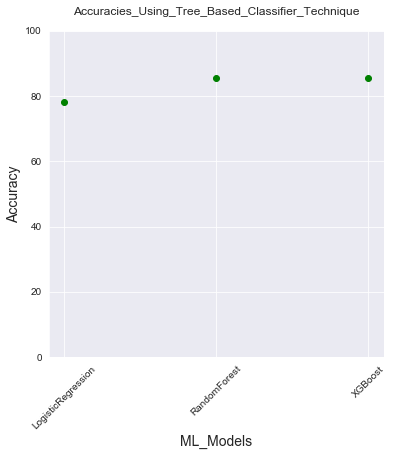

In [101]:
plt.figure(figsize=(6,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML_Model'], acc['Accuracy'], 'go')

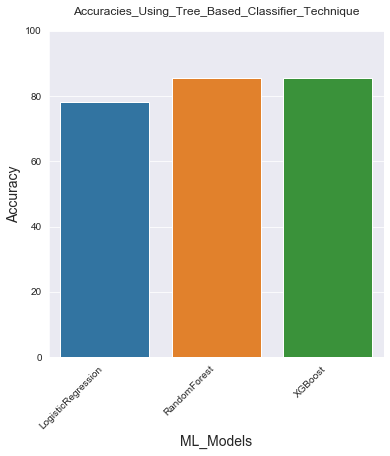

In [102]:
plt.figure(figsize=(6,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="ML_Model",y = "Accuracy", data=d80)

## 5. Top 100 features with highest score

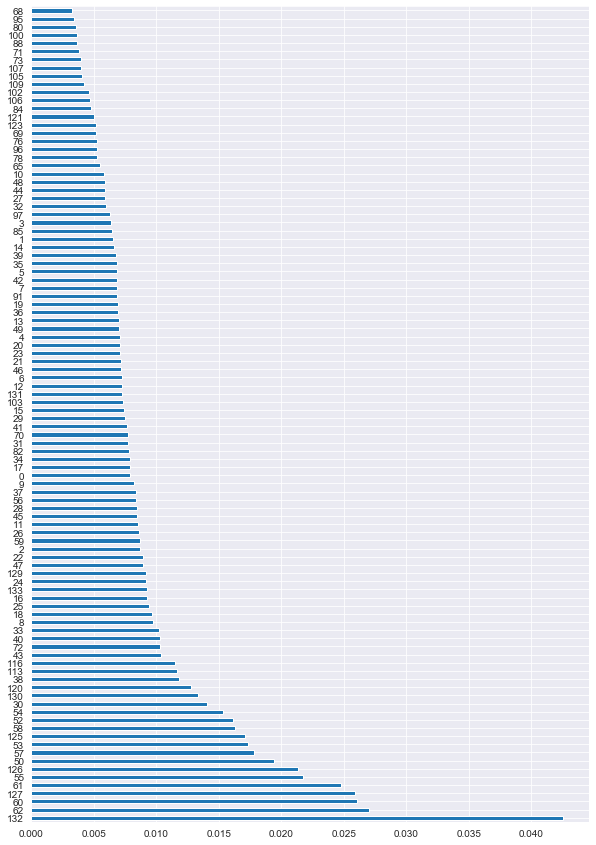

In [103]:
plt.figure(figsize=(10,15))
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [104]:
x = feat_importances.nlargest(100)
y = x.to_frame()
y.head()

,0
132,0.042508
62,0.027012
60,0.026041
127,0.025937
61,0.024826


In [105]:
col5 = y.index.values.tolist()
df = data[col5]
df100 = pd.concat([df,data['label']], axis=1)
df100

,132,62,60,127,61,55,126,50,57,53,...,105,107,73,71,88,100,80,95,68,label
0,-1.080384,0.835272,0.939621,-0.360327,-1.848086,-0.428871,-0.452132,-0.546214,-0.399375,-0.552641,...,-0.943919,-1.166236,0.560834,0.054990,-2.229112,1.591342,0.218429,-1.034240,-0.337791,0
1,-0.973158,0.086622,0.108530,0.263873,0.575377,-0.182729,-0.215571,-0.546214,-0.005420,-0.552641,...,-0.943919,-1.166236,0.560834,0.054990,-2.229112,1.591342,0.218429,-1.034240,-0.337791,1
2,-0.865932,-0.028555,0.364250,-0.776461,0.548745,0.008714,0.115614,1.492851,-0.399375,-0.552641,...,-0.943919,-1.166236,0.560834,0.054990,-2.229112,1.591342,0.218429,-1.034240,-0.337791,8
3,-0.758705,-0.287703,0.316302,2.344540,0.488824,0.200157,0.115614,1.201556,0.191558,-0.552641,...,-0.943919,-1.166236,0.560834,0.054990,-2.229112,1.591342,0.218429,-1.034240,-0.337791,5
4,-0.651479,-0.662028,0.939621,-0.776461,-0.463250,-0.428871,-0.357508,-0.254919,-0.399375,0.816289,...,-0.943919,-1.166236,0.560834,0.054990,-2.229112,1.591342,0.218429,-1.034240,-0.337791,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,0.099106,-0.512298,1.438275,0.471940,-0.601734,-0.264776,-0.215571,-0.546214,-0.202397,-0.552641,...,-1.528547,1.126713,-1.559182,1.529447,-0.674296,-0.172141,-1.585584,0.410681,-0.214260,1
17333,0.206332,-0.212838,0.773402,0.263873,0.090684,-0.128031,-0.191915,-0.546214,-0.005420,-0.552641,...,-1.528547,1.126713,-1.559182,1.529447,-0.674296,-0.172141,-1.585584,0.410681,-0.214260,1
17334,0.313558,-1.410678,-1.553653,-0.568394,-1.848086,-0.456220,-0.475789,-0.546214,-0.399375,-0.552641,...,1.411413,0.607249,0.603193,-1.803755,0.468134,1.469044,-0.689262,-0.235000,0.936362,2
17335,0.420785,-0.595367,1.247010,0.055806,-0.154982,5.916108,5.556521,1.492851,4.919021,-0.552641,...,1.411413,0.607249,0.603193,-1.803755,0.468134,1.469044,-0.689262,-0.235000,0.936362,1


In [106]:
x100 = df100.iloc[:,:-1].values
y100 = df100.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x100,y100, test_size=0.2, random_state=42)

## LogisticRegression

In [107]:
clf.fit(x_train,y_train)
generate_accuracy(clf, x_test, y_test)

Accuracy is:  0.7782583621683967
F1 score is:  0.7782583621683967


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## RandomForestClassifier

In [108]:
rf.fit(x_train,y_train)
generate_accuracy(rf, x_test, y_test)

Accuracy is:  0.8517877739331027
F1 score is:  0.8517877739331028


## ExtremeGradientBoosting

In [109]:
xgb.fit(x_train,y_train)
generate_accuracy(xgb, x_test, y_test)

Accuracy is:  0.854959630911188
F1 score is:  0.854959630911188


## Ploting the Accuracies of all the three models

In [110]:
d100 = {'ML_Model':['LogisticRegression','RandomForest','XGBoost'],
        'Accuracy':[77.82,85.17,85.49]}

acc = pd.DataFrame(d100)

acc

,ML_Model,Accuracy
0,LogisticRegression,77.82
1,RandomForest,85.17
2,XGBoost,85.49


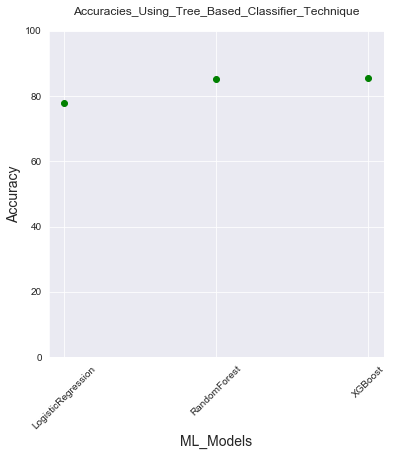

In [111]:
plt.figure(figsize=(6,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML_Model'], acc['Accuracy'], 'go')

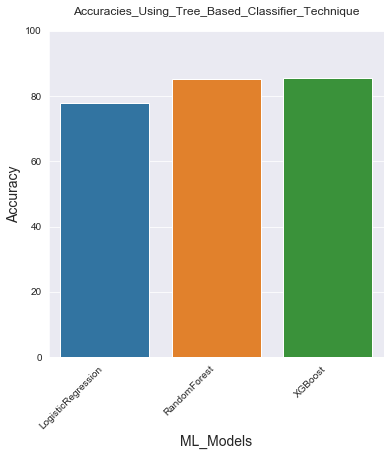

In [112]:
plt.figure(figsize=(6,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="ML_Model",y = "Accuracy", data=d100)

# Method 3 : Using Pearson Correlation


###  Pearson product-moment correlation coefficient (PPMCC) is a statistic that measures linear correlation between two variables X and Y. It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation

In [113]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [114]:
plt.figure(figsize=(16,16))
cor = data.corr()
cor

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,label
0,1.000000,-0.317243,0.161920,-0.012745,-0.099754,0.096521,0.094512,0.069504,0.314963,0.084882,...,-0.085705,0.128213,-0.021470,-0.041070,-0.003316,-0.087008,-0.036698,0.090314,0.095045,0.075470
1,-0.317243,1.000000,0.047230,-0.002943,0.243159,0.099552,-0.102683,0.021640,-0.303299,-0.073410,...,0.054144,-0.073443,-0.020939,0.003526,0.010179,0.046889,-0.029531,-0.093135,-0.101021,-0.070137
2,0.161920,0.047230,1.000000,0.382656,-0.039668,-0.177951,-0.064835,0.095532,0.193079,-0.176911,...,0.044278,-0.064112,0.013008,0.021200,0.053538,0.081517,0.019026,0.016677,-0.045441,0.310863
3,-0.012745,-0.002943,0.382656,1.000000,0.039526,-0.237235,0.035055,0.153656,0.085709,-0.153150,...,0.045582,0.001603,0.066728,-0.000825,0.079453,0.074522,0.013192,-0.021839,0.010043,0.207681
4,-0.099754,0.243159,-0.039668,0.039526,1.000000,0.092442,0.083098,-0.090459,-0.354351,-0.007895,...,0.055303,-0.004179,0.045759,-0.002840,-0.006164,0.043681,-0.002296,-0.097700,0.004273,0.001679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,-0.087008,0.046889,0.081517,0.074522,0.043681,-0.005794,0.014105,0.052090,0.010488,-0.059362,...,0.416953,-0.032195,0.302306,0.268818,0.014871,1.000000,-0.029378,-0.112246,-0.026998,-0.016855
131,-0.036698,-0.029531,0.019026,0.013192,-0.002296,-0.044783,0.022346,0.061067,-0.036941,-0.014100,...,-0.042793,0.023676,-0.058476,-0.000272,0.029102,-0.029378,1.000000,-0.094016,-0.001143,0.081217
132,0.090314,-0.093135,0.016677,-0.021839,-0.097700,-0.068531,-0.001036,-0.044503,0.039610,0.023796,...,-0.145159,0.018745,-0.142829,-0.044569,-0.013760,-0.112246,-0.094016,1.000000,0.100898,-0.002421
133,0.095045,-0.101021,-0.045441,0.010043,0.004273,0.059031,0.094328,-0.099983,-0.041275,0.153149,...,-0.031710,0.124097,0.019333,-0.023720,0.013682,-0.026998,-0.001143,0.100898,1.000000,-0.077714


<Figure size 1152x1152 with 0 Axes>

In [115]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

## Considering the threshold value to be 0.7

In [116]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

50

In [117]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,127,128,129,130,131,132,133
14782,-0.433904,1.659879,0.441820,-0.273569,0.622034,-1.738666,0.158073,0.923025,-1.441858,0.236233,...,-0.177772,-0.158242,-0.415398,0.263873,-0.159069,-0.338560,2.240827,-0.143152,0.099106,0.538832
14531,-1.370865,1.210119,-0.690560,-0.484818,1.029439,0.480565,-0.202149,0.052667,-0.681041,-0.261838,...,-0.177772,-0.158242,-0.415398,-0.776461,-0.159069,-0.338560,-0.322463,-0.143152,-0.973158,0.538832
16243,0.195851,0.015774,0.811705,0.947338,1.157056,-0.506280,-0.433034,0.345084,0.313069,0.132742,...,-0.177772,-0.158242,-0.415398,-0.776461,-0.159069,0.379436,-0.322463,0.716802,1.707501,0.538832
6383,-0.777321,-0.831949,-0.483596,0.970559,1.688183,0.280406,-0.894999,-0.945405,-1.213276,-1.906379,...,0.726314,-0.158242,-0.415398,0.263873,-0.159069,-0.338560,-0.322463,-0.143152,1.600275,-1.855868
424,-0.103309,-0.413561,0.030206,-0.230614,-0.200565,-0.235467,0.078330,0.601497,0.102205,0.044518,...,-0.177772,-0.158242,-0.415398,-0.776461,-0.159069,-0.338560,-0.322463,-0.143152,-0.544253,0.538832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673,0.707950,-0.483715,0.186865,0.563103,-0.920696,0.995562,1.724570,-2.388343,0.310629,-0.060496,...,-0.177772,-0.158242,-0.415398,0.471940,-0.159069,0.020438,-0.322463,-0.143152,-0.008121,0.538832
10766,-0.529093,-0.322362,-1.087633,-0.935110,-1.675120,0.652183,-0.838310,-1.299577,0.460695,0.977621,...,-0.177772,-0.158242,-0.415398,-0.776461,-0.159069,-0.338560,-0.322463,-0.143152,1.064143,0.538832
6601,1.191302,-0.280397,2.088681,2.162195,-0.482097,-0.956320,-1.484059,1.355808,-0.091035,-0.874883,...,-0.177772,-0.158242,-0.415398,-0.568394,-0.159069,0.379436,-0.322463,-0.143152,-0.008121,-1.855868
12905,-0.103309,-0.413561,0.030206,-0.230614,-0.200565,-0.235467,0.078330,0.601497,0.102205,0.044518,...,-0.177772,1.701714,1.510721,1.304206,-0.159069,1.456431,2.240827,-0.143152,-0.758705,0.538832


## LogisticRegression

In [118]:
clf.fit(x_train,y_train)
generate_accuracy(clf, x_test, y_test)

Accuracy is:  0.779123414071511
F1 score is:  0.7791234140715111


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## RandomForestClassifier

In [119]:
rf.fit(x_train,y_train)
generate_accuracy(rf, x_test, y_test)

Accuracy is:  0.8514994232987313
F1 score is:  0.8514994232987313


## ExtremeGradientBoosting Classifier

In [120]:
xgb.fit(x_train,y_train)
generate_accuracy(xgb, x_test, y_test)

Accuracy is:  0.8604382929642446
F1 score is:  0.8604382929642447


## Ploting the Accuracies of all the three models

In [121]:
df = {'ML_Model':['LogisticRegression','RandomForest','XGBoost'],
        'Accuracy':[77.9,85.14,86.04]}

acc = pd.DataFrame(df)

acc

,ML_Model,Accuracy
0,LogisticRegression,77.90
1,RandomForest,85.14
2,XGBoost,86.04


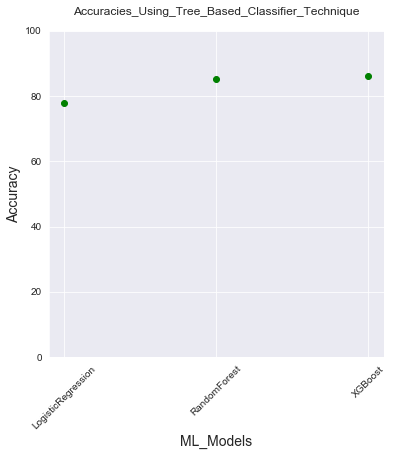

In [122]:
plt.figure(figsize=(6,6))
plt.ylim(0,100)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45)
plt.plot(acc['ML_Model'], acc['Accuracy'], 'go')

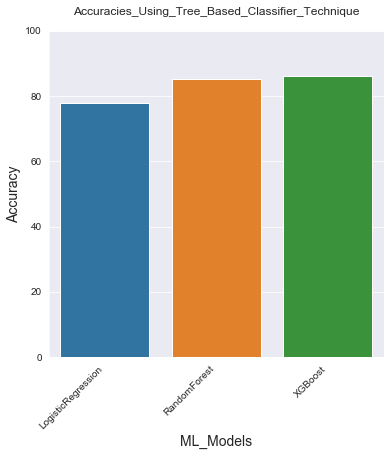

In [123]:
plt.figure(figsize=(6,6))
sns.set_style(style="darkgrid")
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('ML_Models', fontsize = 14)
plt.title('Accuracies_Using_Tree_Based_Classifier_Technique', fontsize = 12, y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
ax = sns.barplot(x="ML_Model",y = "Accuracy", data=df)

### 1.SelectKBest Method : The SelectKBest class just scores the features using a function (in this case f_classif but could be others) .Function taking two arrays X and y, and returns a single array with scores.
#### Most Useful Features : [113, 72, 96, 85, 70, 71, 65, 91, 76, 97, 100, 109, 121, 58, 57, 55, 111, 95, 126, 116, 86, 103, 80, 89, 67, 59, 94, 105, 82, 73, 8, 56, 26, 112, 106, 107, 125,62, 127, 68, 61, 38, 79, 19, 7, 60, 98, 2, 33]
#### Least Useful Features : ['0', '1', '3', '4', '5', '6', '9','10', '11', '12', '13', '14', '15','16', '17', '18', '20', '21', '22', '23', '24', '25', '27', '28', '29','30', '31','32', '34', '35', '36', '37', '39', '40', '41', '42','43','44', '45', '46', '47', '48', '49', '50', '51', '52','53', '54', '63','64', '66', '69', '74', '75', '77', '78','81', '83', '84', '87', '88','90', '92', '93', '99', '101','102', '104', '108', '110', '114', '115',’117', '118', '119','120', '122', '123', '124', '128', '129', '130','131', '132','133']


#### Feature importance Using Tree Based Classifiers: Feature Importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable
#### Most Useful Features : ['132', '61', '60', '127', '62', '126','55', '50', '58', '57', '113', '53', '52', '125', '30', '54', '130', '120', '40', '72']
#### Least Useful Features : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20', '21', '22', '23', '24', '25', '26', '27','28', '29', '31', '32', '33', '34', '35', '36', '37', '38','39', '41', '42', '43', '44', '45', '46', '47', '48', '49','51', '56', '59', '63', '64', '65', '66', '67', '68', '69','70', '71', '73', '74', '75', '76', '77', '78', '79', '80','81', '82', '83', '84', '85', '86', '87', '88', '89', '90','91', '92', '93', '94', '95', '96', '97', '98', '99', '100','101', '102', '103', '104', '105', '106', '107', '108', '109','110', '111', '112', '114', '115', '116', '117', '118', '119','121', '122', '123', '124', '128', '129', '131', '133']


#### Using Pearson Correlation : Pearson product-momentcorrelation coefficient (PPMCC) is a statistic that measures linear correlation between two variables X and Y. It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation
#### Most Useful Features : ['0', '1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20', '21', '22', '23', '24', '25', '26', '27','28', '29', '30', '31', '32', '33', '34', '35', '36', '37','38', '39', '40', '41', '42', '43', '44', '45', '46', '47','48', '49', '50', '51', '52', '53', '54', '60', '61', '62','63', '64', '66', '67', '68', '69', '70', '71', '72', '73','79', '80', '83', '84', '85', '86', '91', '95', '103', '105','114', '117', '118', '119', '120', '122', '123', '124', '125','127', '128', '129', '130', '131', '132', '133']
#### Least Useful Features : ['100', '106', '78', '82', '74', '112','56', '77', '97', '58', '108', '57', '81', '89', '104', '121','55', '98', '76', '90', '88', '75', '110', '59', '111', '101','116', '113', '107', '115', '102', '65', '126', '99', '109','92', '94', '96', '87', '93']